In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
df_health = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
 df_health.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df_health.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,5110.0,NaN,NaN,NaN,36517.829354,21161.721625,67.0,17741.25,36932.0,54682.0,72940.0
gender,5110,3,Female,2994,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,5110.0,NaN,NaN,NaN,43.226614,22.612647,0.08,25.0,45.0,61.0,82.0
hypertension,5110.0,NaN,NaN,NaN,0.097456,0.296607,0.0,0.0,0.0,0.0,1.0
heart_disease,5110.0,NaN,NaN,NaN,0.054012,0.226063,0.0,0.0,0.0,0.0,1.0
ever_married,5110,2,Yes,3353,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_type,5110,5,Private,2925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Residence_type,5110,2,Urban,2596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_glucose_level,5110.0,NaN,NaN,NaN,106.147677,45.28356,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,NaN,NaN,NaN,28.893237,7.854067,10.3,23.5,28.1,33.1,97.6


In [6]:
df_health.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
unique_vals=[]

for col in df_health.columns:
    unival=df_health[col].nunique()
    unique_vals.append(unival)

#Presenting the findings using a dataframe
pd.DataFrame(unique_vals,columns=['Unique_Values'],index=df_health.columns)

,Unique_Values
id,5110
gender,3
age,104
hypertension,2
heart_disease,2
ever_married,2
work_type,5
Residence_type,2
avg_glucose_level,3979
bmi,418


df_health['hypertension']=df_health['hypertension'].astype('object')
df_health['heart_disease']=df_health['heart_disease'].astype('object')


In [8]:
df_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [9]:
numerical_cols = [ i for i in df_health.columns if df_health[i].dtype!='O']
categorical_cols = [i for i in df_health.columns if df_health[i].dtype == 'O']

In [10]:
len(numerical_cols)

7

In [11]:
con_cols=['age','avg_glucose_level','bmi']

In [12]:
for i in categorical_cols:
    print(df_health[i].unique())
    print(f"{'*'*20}")

['Male' 'Female' 'Other']
********************
['Yes' 'No']
********************
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
********************
['Urban' 'Rural']
********************
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
********************


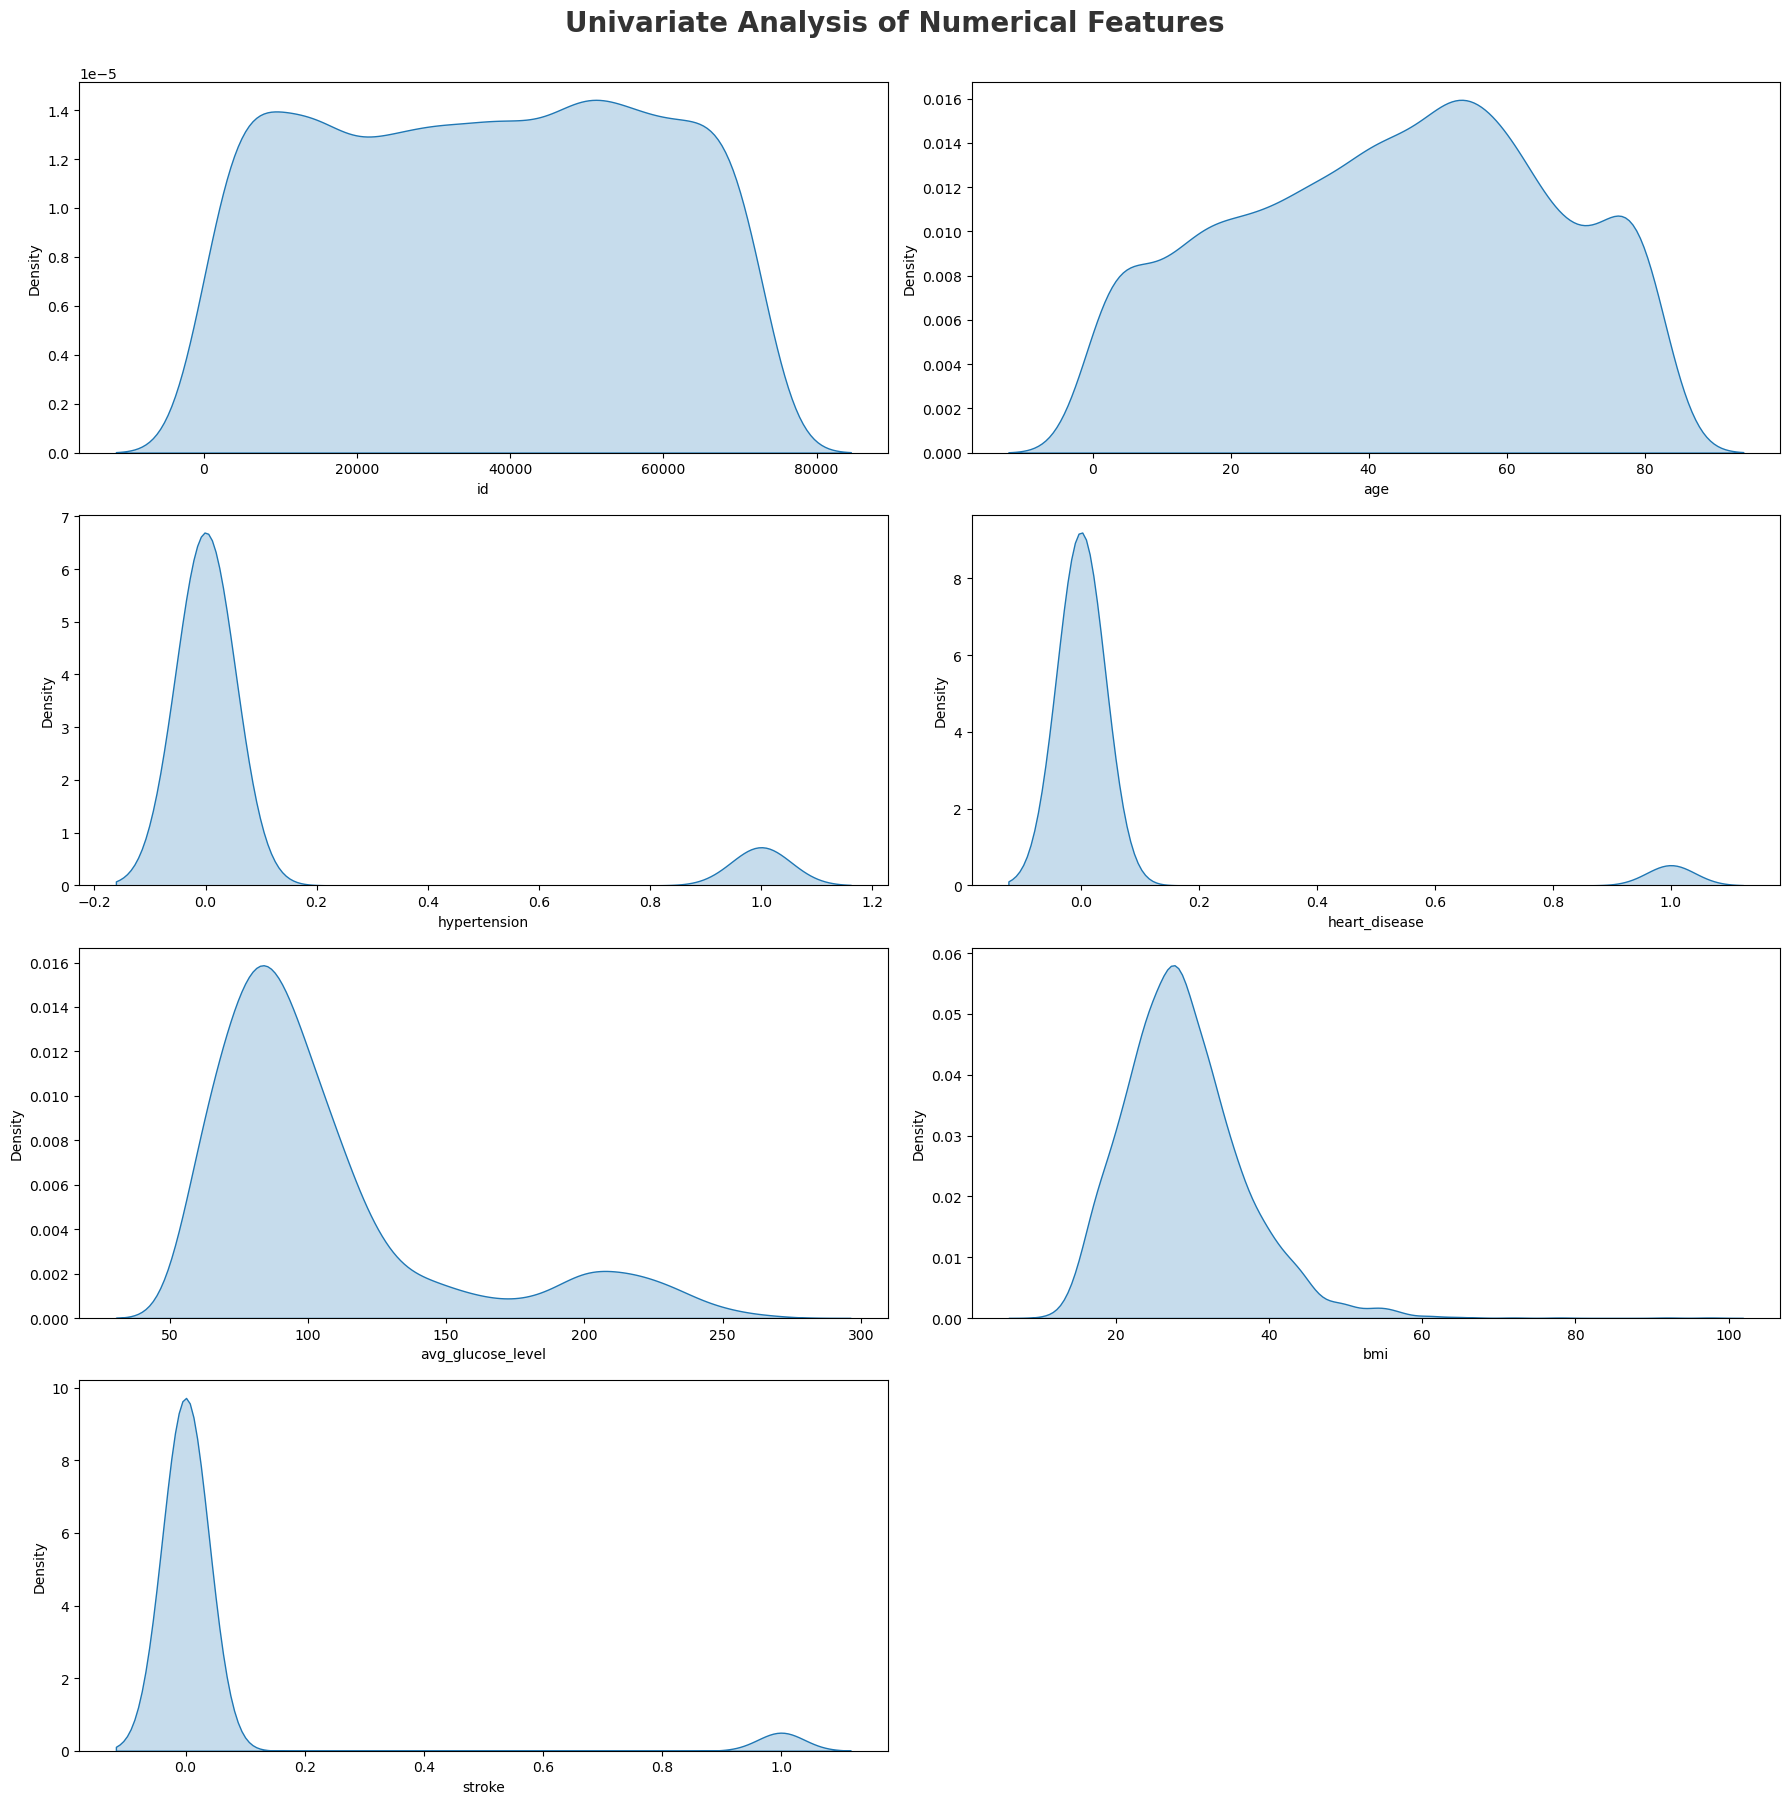

In [13]:
plt.figure(figsize=(18,18))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_cols)):
    plt.subplot(4, 2, i+1)
    sns.kdeplot(x=df_health[numerical_cols[i]],shade=True,data=df_health)
    plt.xlabel(numerical_cols[i])
    plt.tight_layout()

<Axes: xlabel='stroke', ylabel='count'>

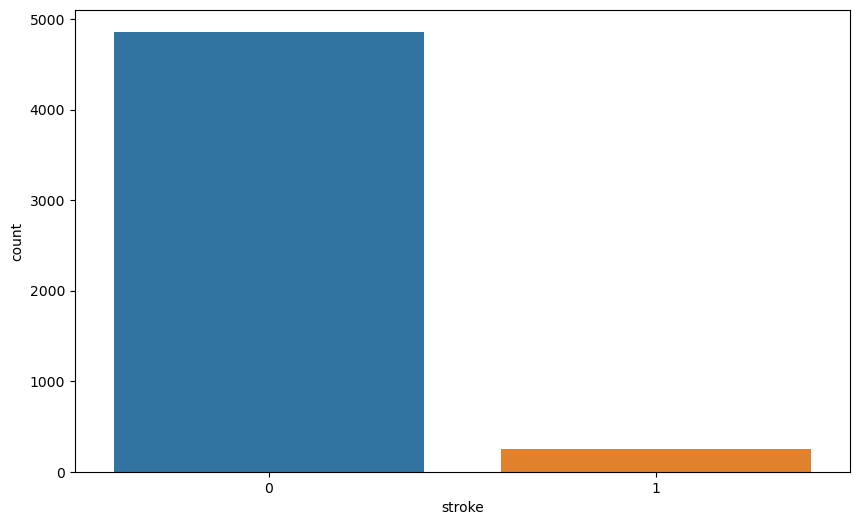

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(x=df_health.stroke,data=df_health)

- Dataset is Imbalance 

<Axes: xlabel='age', ylabel='avg_glucose_level'>

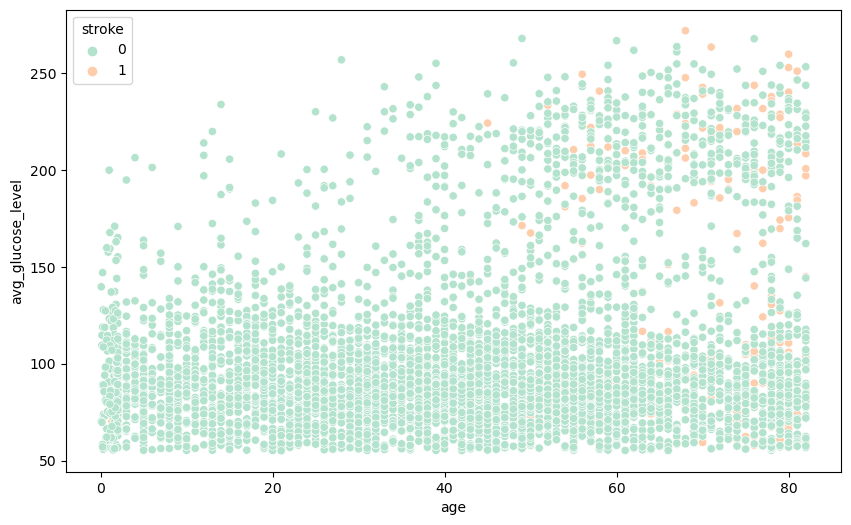

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df_health.age,
    y=df_health.avg_glucose_level ,
    hue=df_health.stroke,
    data=df_health,
    palette='Pastel2')

<Figure size 1000x600 with 0 Axes>

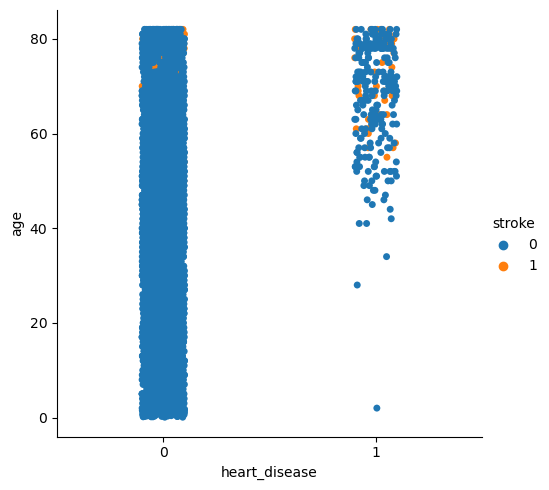

In [16]:
plt.figure(figsize=(10,6))
sns.catplot(data=df_health, x='heart_disease', y='age', hue='stroke')

<Figure size 1000x600 with 0 Axes>

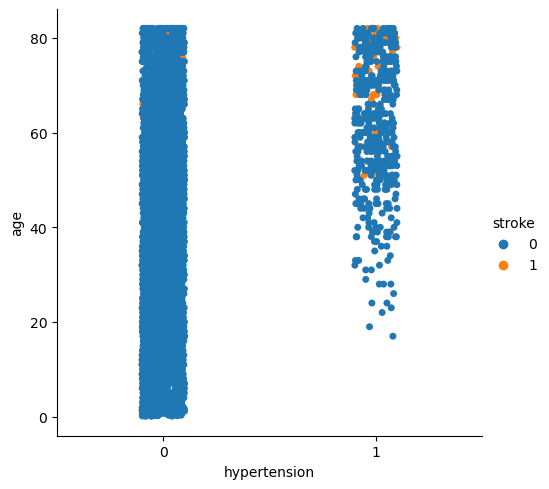

In [17]:
plt.figure(figsize=(10,6))
sns.catplot(data=df_health, x='hypertension', y='age', hue='stroke')

<Axes: xlabel='gender', ylabel='count'>

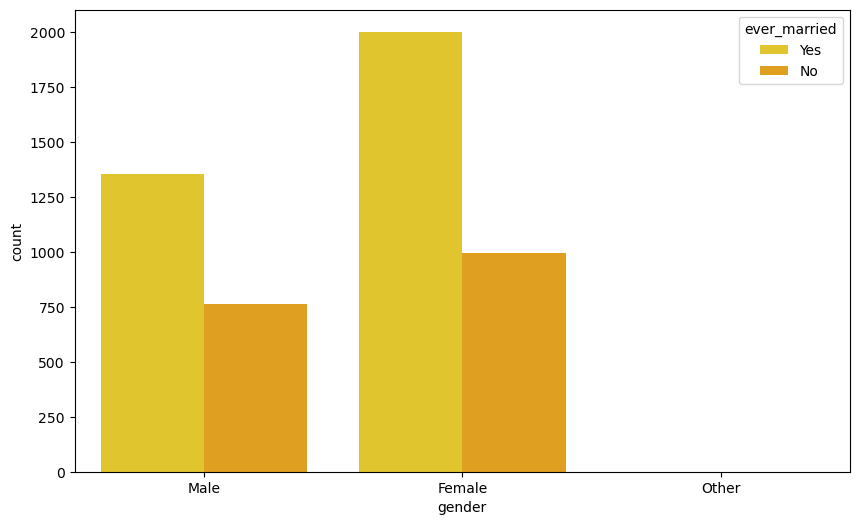

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(x='gender',hue='ever_married',data=df_health,palette='Wistia')

<Axes: xlabel='work_type', ylabel='count'>

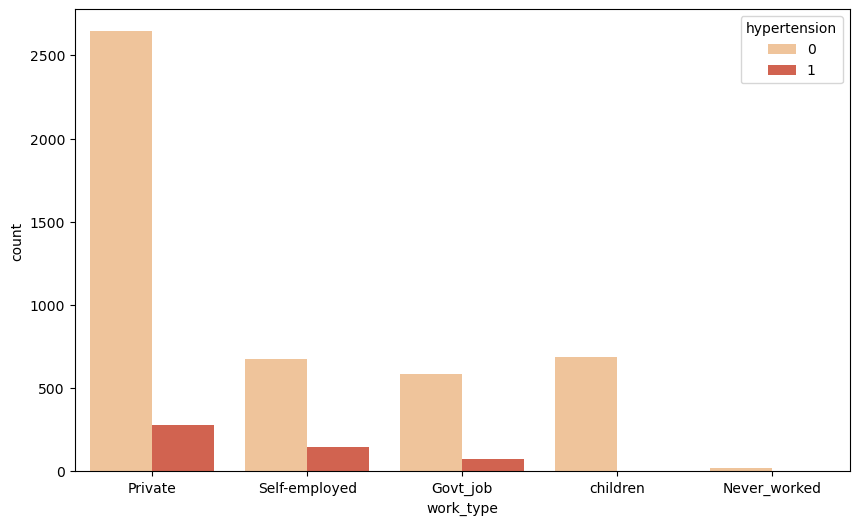

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(x='work_type',hue='hypertension',data=df_health,palette='OrRd')

<Axes: xlabel='work_type', ylabel='count'>

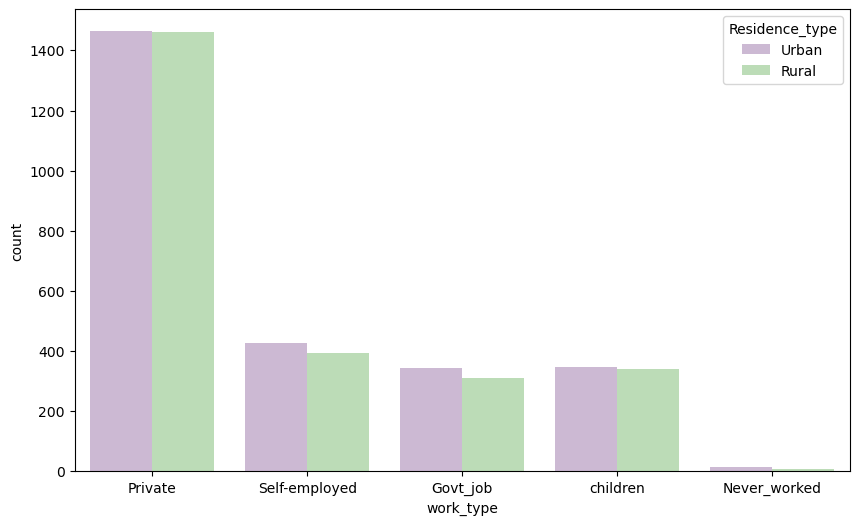

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(x='work_type',hue='Residence_type',data=df_health,palette='PRGn' )

<Axes: xlabel='work_type', ylabel='count'>

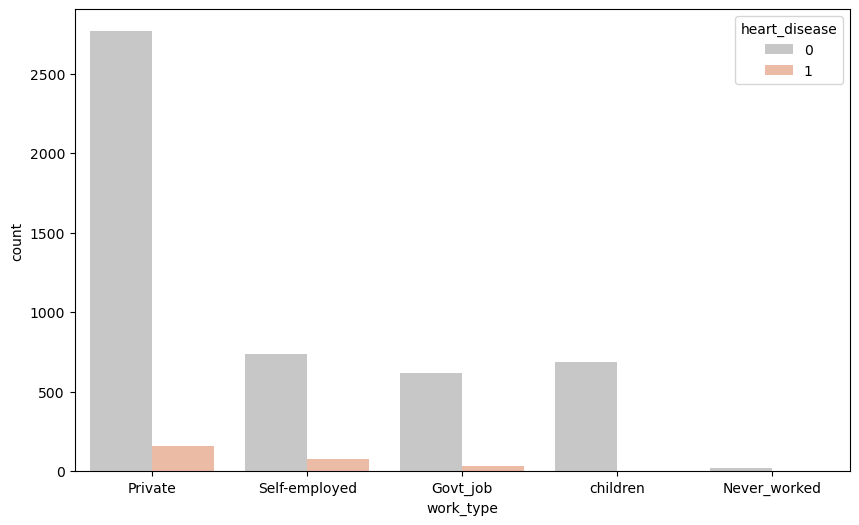

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(x='work_type',hue='heart_disease',data=df_health,palette='RdGy_r')

<Axes: xlabel='work_type', ylabel='count'>

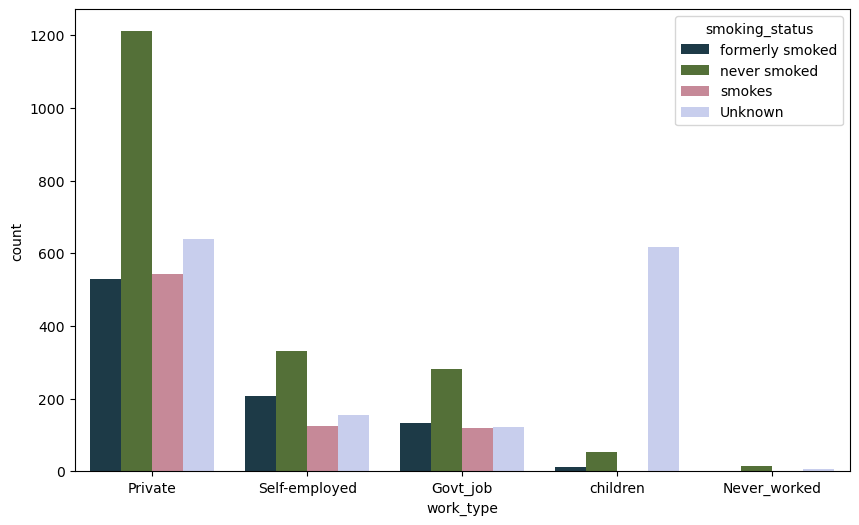

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(x='work_type',hue='smoking_status',data=df_health,palette='cubehelix')

<Axes: xlabel='work_type', ylabel='count'>

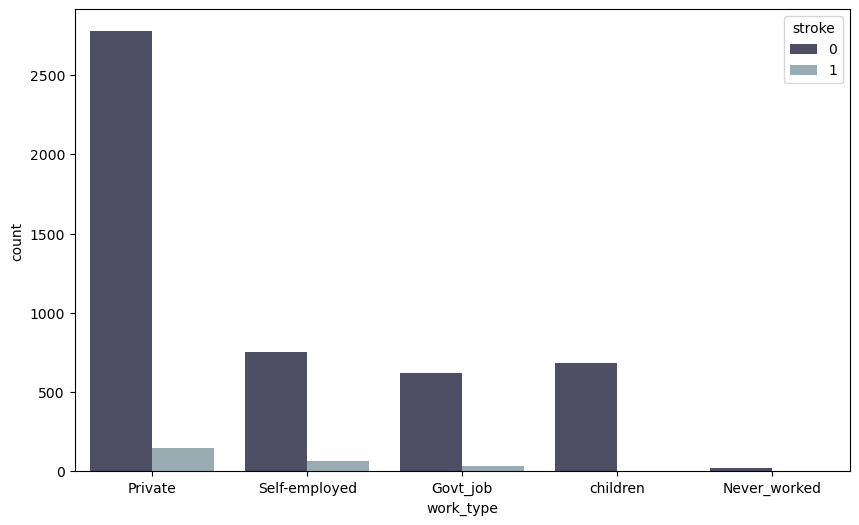

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(x='work_type',hue='stroke',data=df_health,palette='bone')

<Figure size 1000x1000 with 0 Axes>

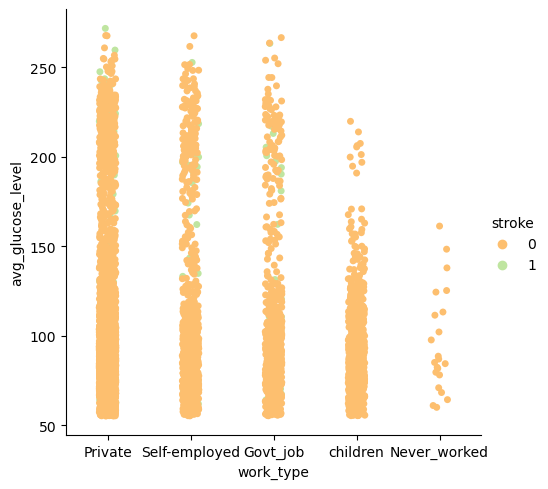

In [24]:
plt.figure(figsize=(10,10))
sns.catplot(data=df_health, x='work_type', y='avg_glucose_level', hue='stroke',palette='Spectral')

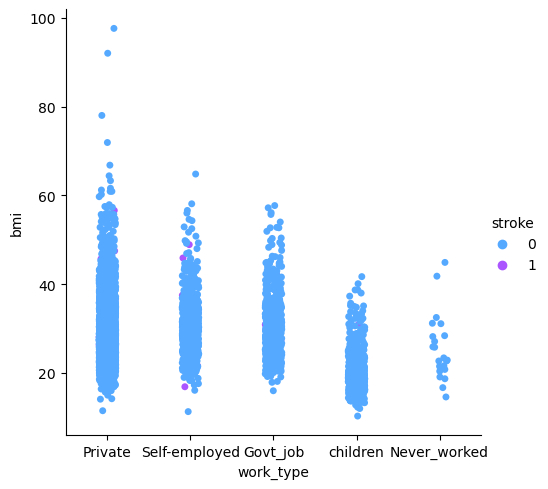

In [25]:

sns.catplot(data=df_health, x='work_type', y='bmi', hue='stroke',palette='cool')

<Axes: xlabel='hypertension', ylabel='count'>

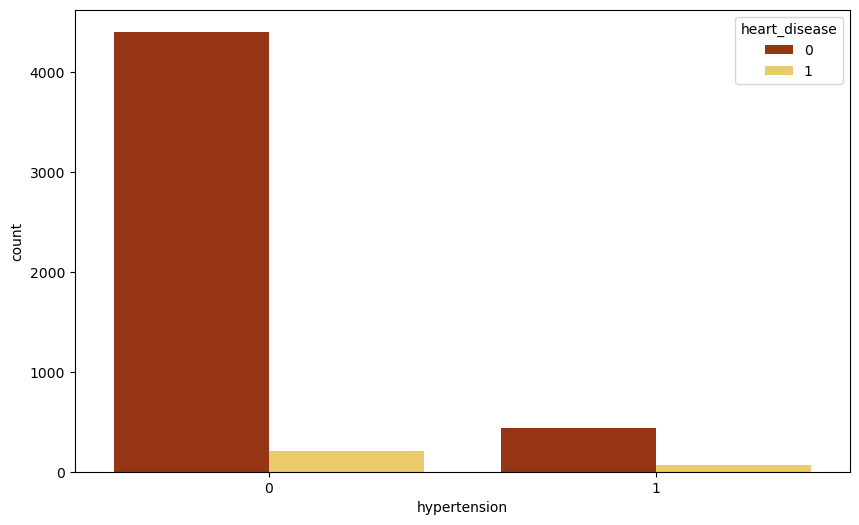

In [26]:

plt.figure(figsize=(10,6))
sns.countplot(x='hypertension',hue='heart_disease',data=df_health,palette='afmhot')

<Axes: xlabel='hypertension', ylabel='count'>

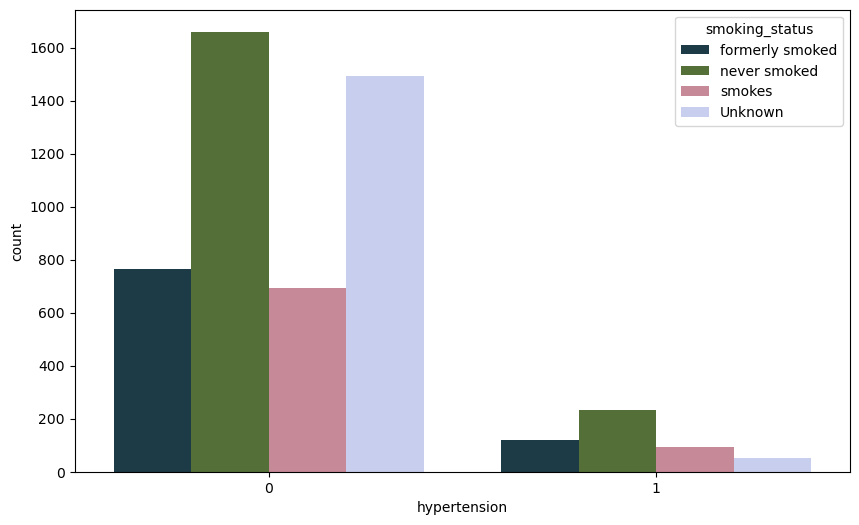

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(x='hypertension',hue='smoking_status',data=df_health,palette='cubehelix')

<Axes: xlabel='heart_disease', ylabel='count'>

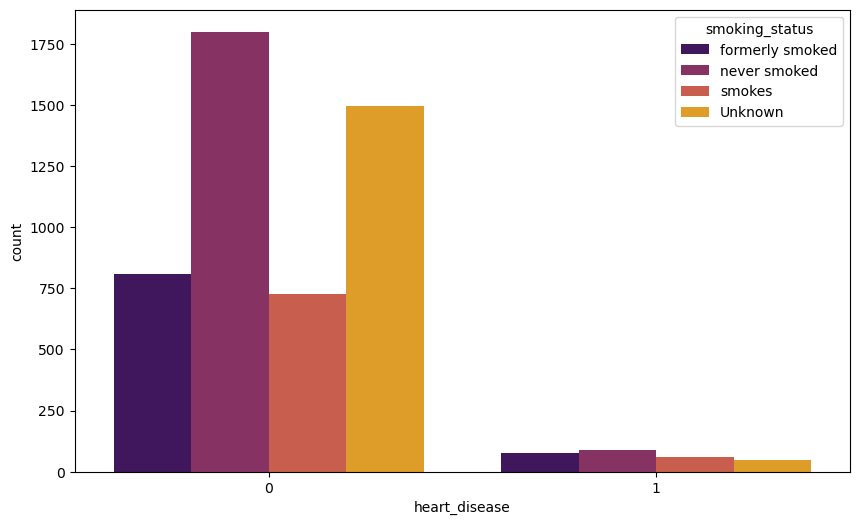

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(x='heart_disease',hue='smoking_status',data=df_health,palette='inferno')

<Axes: xlabel='age', ylabel='bmi'>

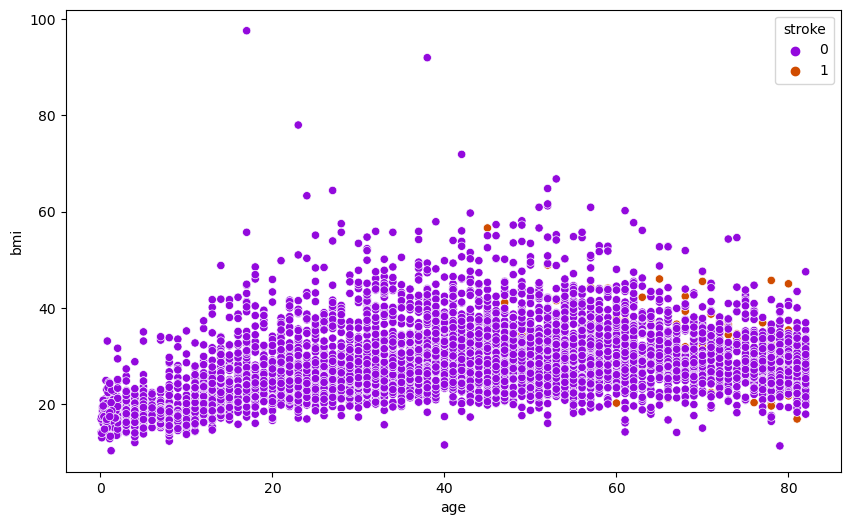

In [29]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df_health.age,
    y=df_health.bmi ,
    hue=df_health.stroke,
    data=df_health,
    palette='gnuplot')

<Axes: xlabel='age', ylabel='bmi'>

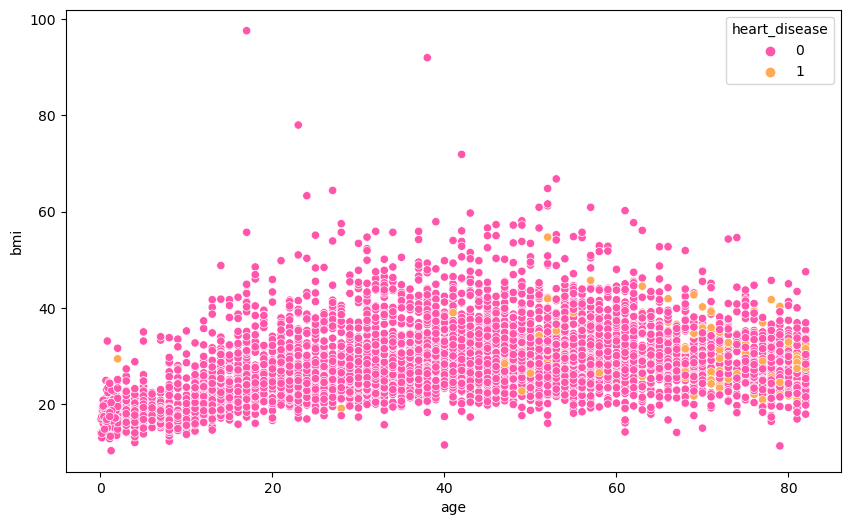

In [30]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df_health.age,
    y=df_health.bmi,
    hue=df_health.heart_disease,
    data=df_health,
    palette='spring')

<Axes: xlabel='bmi', ylabel='avg_glucose_level'>

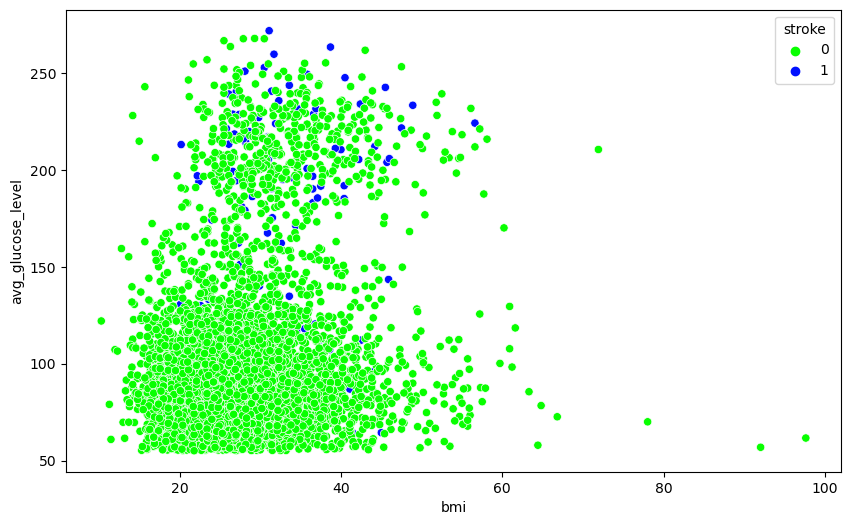

In [31]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df_health.bmi,
    y=df_health.avg_glucose_level,
    hue=df_health.stroke,
    data=df_health,
    palette='hsv')

In [32]:
df_health.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Feature Engineering

In [33]:
#df_health['gender']=df_health['gender'].map({'Male':1,'Female':2,'Other':0})
#df_health['Residence_type']=df_health['Residence_type'].map({'Urban':1,'Rural':0})

In [34]:
df_health = pd.get_dummies(df_health,columns=["gender","ever_married", "work_type","Residence_type", "smoking_status"] ,drop_first = True)

In [35]:
df_health['bmi'] = df_health['bmi'].fillna(df_health['bmi'].mean())

In [36]:
df_health.isnull().sum()

id                                0
age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
stroke                            0
gender_Male                       0
gender_Other                      0
ever_married_Yes                  0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Urban              0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

## Spliting the Data

In [37]:
X = df_health.drop(['id','stroke'], axis=1)
y = df_health['stroke']

In [38]:
X.isna().sum()

age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
gender_Male                       0
gender_Other                      0
ever_married_Yes                  0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Urban              0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [39]:
print(X.shape)

(5110, 16)


In [40]:
print(y.shape)

(5110,)


## Handle Imbalance datasets >> Oversampling of Minority Class

In [41]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [42]:
from imblearn.over_sampling import RandomOverSampler

In [43]:
os=RandomOverSampler(sampling_strategy='minority')


In [44]:
X_over,y_over=os.fit_resample(X,y)


## Splitting into train and test set

In [45]:
from sklearn.model_selection import train_test_split


In [46]:
X_train,X_test,y_train,y_test = train_test_split(X_over,y_over,test_size=0.3,stratify=y_over,random_state=42)

## Scaling of numerical columns

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
sc = StandardScaler()

In [49]:
#X_train[con_cols]=sc.fit_transform(X_train[con_cols])
#X_test[con_cols]=sc.transform(X_test[con_cols])
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [50]:
#print("The number of classes before fit {}".format(Counter(y_train)))
#print("The number of classes after fit {}".format(Counter(y_train_os)))

In [51]:
X_test

array([[-0.52816819, -0.46223532, -0.3574576 , ..., -0.54808877,
         1.34308343, -0.4343343 ],
       [ 1.13382554, -0.46223532, -0.3574576 , ..., -0.54808877,
        -0.74455539, -0.4343343 ],
       [-2.05540567, -0.46223532, -0.3574576 , ..., -0.54808877,
        -0.74455539, -0.4343343 ],
       ...,
       [-2.40397517, -0.46223532, -0.3574576 , ..., -0.54808877,
        -0.74455539, -0.4343343 ],
       [-1.20194943, -0.46223532, -0.3574576 , ..., -0.54808877,
        -0.74455539, -0.4343343 ],
       [-0.25865569, -0.46223532, -0.3574576 , ..., -0.54808877,
        -0.74455539, -0.4343343 ]])

## Model Building

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix


In [53]:
def classalgo_test(x_train,x_test,y_train,y_test): #classification
      
    g=GaussianNB()
    b=BernoulliNB()
    kc=KNeighborsClassifier()
    lr=LogisticRegression()
    dc=DecisionTreeClassifier()
    rfc=RandomForestClassifier()
    gbc=GradientBoostingClassifier()
    xgb=XGBClassifier()
    Bagging=BaggingClassifier()
    AdaBoost=AdaBoostClassifier()
    
    algos = [g,b,kc,lr,dc,rfc,gbc,xgb,Bagging,AdaBoost]
    algo_names = ['GaussianNB','BernoulliNB','KNeighborsClassifier','LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier','BaggingClassifier','XGBClassifier','AdaBoostClassifier']
    Train_acc=[]
    Train_precsc=[]
    Train_fsc=[]
    Train_Recall=[]
    Test_acc=[]
    Test_precsc=[]
    Test_fsc=[]
    Test_Recall=[]
    Test_AUC=[]
    
    result = pd.DataFrame(index = algo_names)
    
    for algo in algos:
    
        algo.fit(x_train,y_train)
        y_train_pred = algo.predict(x_train)
        y_test_pred = algo.predict(x_test)
        Train_acc.append(accuracy_score(y_train,y_train_pred))
        Train_precsc.append(precision_score(y_train,y_train_pred))
        Train_fsc.append(f1_score(y_train,y_train_pred))
        Train_Recall.append(recall_score(y_train,y_train_pred,average='micro'))
        
        
        Test_acc.append(accuracy_score(y_test,y_test_pred))
        Test_precsc.append(precision_score(y_test,y_test_pred))
        Test_fsc.append(f1_score(y_test,y_test_pred))
        Test_Recall.append(recall_score(y_test,y_test_pred,average='micro'))
        Test_AUC.append(roc_auc_score(y_test,y_test_pred))
        
    
    result['Train_Accuracy Score'] = Train_acc
    result['Train_Precision Score'] = Train_precsc
    result['Train_F1Score']= Train_fsc
    result['Train_Recall']= Train_Recall    
    result['Test_Accuracy Score'] = Test_acc
    result['Test_Precision Score'] = Test_precsc
    result['Test_F1Score']= Test_fsc
    result['Test_Recall']= Test_Recall
    result['Test_AUC_Score']= Test_AUC
        
    return result.sort_values('Test_Accuracy Score', ascending=False)

In [54]:
classalgo_test(X_train,X_test,y_train,y_test)

,Train_Accuracy Score,Train_Precision Score,Train_F1Score,Train_Recall,Test_Accuracy Score,Test_Precision Score,Test_F1Score,Test_Recall,Test_AUC_Score
RandomForestClassifier,1.000000,1.000000,1.000000,1.000000,0.989373,0.979181,0.989481,0.989373,0.989376
XGBClassifier,1.000000,1.000000,1.000000,1.000000,0.986973,0.974599,0.987136,0.986973,0.986977
DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000,0.976688,0.955439,0.977212,0.976688,0.976696
BaggingClassifier,0.996914,0.993867,0.996924,0.996914,0.976003,0.954188,0.976557,0.976003,0.976011
KNeighborsClassifier,0.944306,0.899788,0.947251,0.944306,0.913610,0.852632,0.920455,0.913610,0.913639
GradientBoostingClassifier,0.863483,0.824161,0.871312,0.863483,0.854988,0.810066,0.864727,0.854988,0.855013
AdaBoostClassifier,0.797649,0.772752,0.806520,0.797649,0.790195,0.763716,0.800131,0.790195,0.790213
LogisticRegression,0.775606,0.755169,0.784292,0.775606,0.775797,0.750311,0.786554,0.775797,0.775814
BernoulliNB,0.750625,0.717713,0.768201,0.750625,0.756942,0.722519,0.774276,0.756942,0.756968
GaussianNB,0.567377,0.536574,0.695805,0.567377,0.569763,0.537746,0.697372,0.569763,0.569908


In [55]:
rf=RandomForestClassifier()

In [56]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [57]:
rf_predict=rf.predict(X_test)

In [58]:
print(classification_report(y_test,rf_predict))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1459
           1       0.98      1.00      0.99      1458

    accuracy                           0.99      2917
   macro avg       0.99      0.99      0.99      2917
weighted avg       0.99      0.99      0.99      2917



In [59]:
print(confusion_matrix(y_test,rf_predict))

[[1428   31]
 [   0 1458]]


Text(50.722222222222214, 0.5, 'Actual')

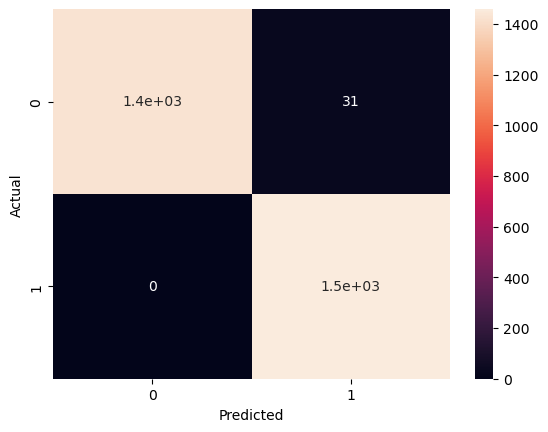

In [60]:
sns.heatmap(confusion_matrix(y_test,rf_predict),annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [61]:
xgb=XGBClassifier()

In [62]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [63]:
xgb_predict=xgb.predict(X_test)

In [64]:
print(classification_report(y_test,xgb_predict))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98      1459
           1       0.95      1.00      0.98      1458

    accuracy                           0.98      2917
   macro avg       0.98      0.98      0.98      2917
weighted avg       0.98      0.98      0.98      2917



In [65]:
print(confusion_matrix(y_test,xgb_predict))

[[1389   70]
 [   0 1458]]


In [66]:
import pickle

In [67]:
pickle.dump(rf,open('stoke_prediction.pkl','wb'))

In [68]:
pickle.dump(sc,open('scaler.pkl','wb'))